In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dynadojo as dd
import numpy as np

2023-08-20 17:44:31.047095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<Figure size 640x480 with 1 Axes>, <Axes: >)

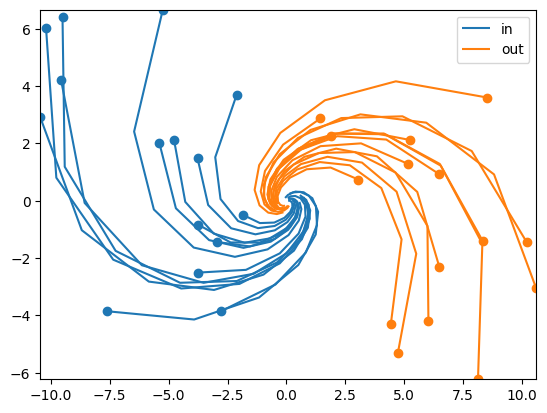

In [3]:
latent_dim = 2
embed_dim = 3
n = 5000
timesteps = 10
system = dd.systems.LDSSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
dd.utils.lds.plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

Epoch 1/20
157/157 [==============================] - 4s 4ms/step - loss: 1.5360
Epoch 2/20
157/157 [==============================] - 1s 4ms/step - loss: 1.1526
Epoch 3/20
157/157 [==============================] - 1s 4ms/step - loss: 0.9194
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 0.7234
Epoch 5/20
157/157 [==============================] - 1s 3ms/step - loss: 0.5686
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 0.4497
Epoch 7/20
157/157 [==============================] - 1s 4ms/step - loss: 0.3596
Epoch 8/20
157/157 [==============================] - 1s 4ms/step - loss: 0.2916
Epoch 9/20
157/157 [==============================] - 0s 3ms/step - loss: 0.2404
Epoch 10/20
157/157 [==============================] - 0s 3ms/step - loss: 0.2018
Epoch 11/20
157/157 [==============================] - 0s 3ms/step - loss: 0.1726
Epoch 12/20
157/157 [==============================] - 0s 3ms/step - loss: 0.1505
Epoch 13/20
157/157 [====

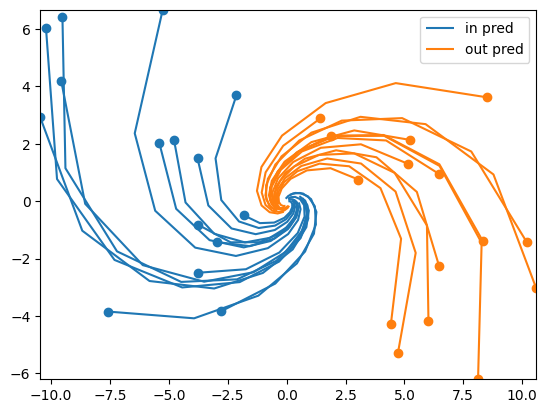

In [5]:
linear_model = dd.baselines.DNN(embed_dim, timesteps, activation=None, max_control_cost=0)
linear_model.fit(x, epochs=20, verbose='auto')
x_pred = linear_model.predict(x[:, 0], timesteps)
y_pred = linear_model.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")

Epoch 1/20
157/157 [==============================] - 3s 4ms/step - loss: 1.7268
Epoch 2/20
157/157 [==============================] - 1s 3ms/step - loss: 0.9070
Epoch 3/20
157/157 [==============================] - 0s 3ms/step - loss: 0.5908
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 0.4165
Epoch 5/20
157/157 [==============================] - 0s 3ms/step - loss: 0.3207
Epoch 6/20
157/157 [==============================] - 0s 3ms/step - loss: 0.2662
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 0.2337
Epoch 8/20
157/157 [==============================] - 0s 3ms/step - loss: 0.2135
Epoch 9/20
157/157 [==============================] - 1s 3ms/step - loss: 0.2008
Epoch 10/20
157/157 [==============================] - 1s 3ms/step - loss: 0.1918
Epoch 11/20
157/157 [==============================] - 0s 3ms/step - loss: 0.1852
Epoch 12/20
157/157 [==============================] - 0s 3ms/step - loss: 0.1798
Epoch 13/20
157/157 [====

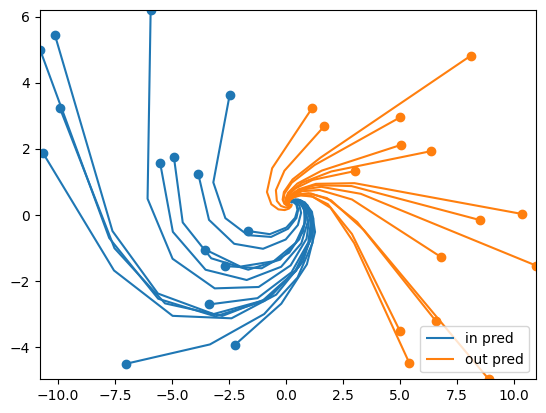

In [6]:
nonlinear_model = dd.baselines.DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
nonlinear_model.fit(x, epochs=20, verbose='auto')
x_pred = nonlinear_model.predict(x[:, 0], timesteps)
y_pred = nonlinear_model.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")